In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Exploratory Data Analysis:

## File Importation & Data Cleaning:

### Importing:

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import & create train/test
train = pd.read_csv("/content/drive/MyDrive/Research/Blast AI/Spaceship Titanic Capstone Project/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Research/Blast AI/Spaceship Titanic Capstone Project/test.csv")

In [ ]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


### Encoding:

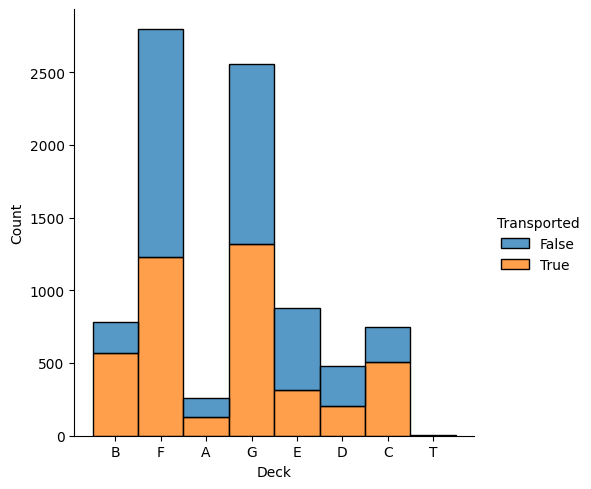

In [ ]:
# Conver the Cabin column to individual columns with Deck, Num, and Side:
import re
train[['Deck', 'Num', 'Side']] = train['Cabin'].str.split("/", expand = True)
train['Num'] = train['Num'].apply(pd.to_numeric, errors='coerce')
train['Side'].replace({"P":1, "S":0}, inplace = True)

test[['Deck', 'Num', 'Side']] = test['Cabin'].str.split("/", expand = True)
test['Num'] = test['Num'].apply(pd.to_numeric, errors='coerce')
test['Side'].replace({"P":1, "S":0}, inplace = True)
# To know how to label encode the Deck column, we can see which Decks correspond to Transported the most:
sns.displot(data = train, x = 'Deck', hue = 'Transported', multiple = "stack")

In [ ]:
values = train['Deck'].unique()
for i in values:
  percent = (train[train['Deck'] == i]['Transported'].sum())/(len(train[train['Deck'] == i]))
  print("% Transported For", i, ":", percent)

% Transported For B : 0.7342747111681643
% Transported For F : 0.43987115246957764
% Transported For A : 0.49609375
% Transported For G : 0.5162172723720203
% Transported For nan : nan
% Transported For E : 0.3573059360730594
% Transported For D : 0.4330543933054393
% Transported For C : 0.6800535475234271
% Transported For T : 0.2


<ipython-input-7-382773b88667>:3: RuntimeWarning: invalid value encountered in long_scalars
  percent = (train[train['Deck'] == i]['Transported'].sum())/(len(train[train['Deck'] == i]))


In [ ]:
train['Deck'].replace({"A":0, "B":0, "C":0, "D":1, "E":1, "F":1, "G": 0, "T":1}, inplace = True)
test['Deck'].replace({"A":0, "B":0, "C":0, "D":1, "E":1, "F":1, "G": 0, "T":1}, inplace = True)

In [ ]:
# Numerically encoding Transported and other 'boolean' columns for train:
train['Transported'].replace({True:1, False:0}, inplace = True)

print("CyroSleep Column Values:", train['CryoSleep'].unique())
train['CryoSleep'].replace({True: 1, False: 0}, inplace = True)

print("VIP Column Values:", train['VIP'].unique())
train['VIP'].replace({True: 1, False: 0}, inplace = True)

CyroSleep Column Values: [False True nan]
VIP Column Values: [False True nan]


In [ ]:
# Numerically encoding 'boolean' columns for test:
print("CyroSleep Column Values:", test['CryoSleep'].unique())
test['CryoSleep'].replace({True: 1, False: 0}, inplace = True)

print("VIP Column Values:", test['VIP'].unique())
test['VIP'].replace({True: 1, False: 0}, inplace = True)

CyroSleep Column Values: [True False nan]
VIP Column Values: [False nan True]


In [ ]:
# Create an IsKid col:
train['IsKid'] = train['Age'] <= 12
train['IsKid'].replace({True: 1, False: 0}, inplace = True)

test['IsKid'] = test['Age'] <= 12
test['IsKid'].replace({True: 1, False: 0}, inplace = True)

In [ ]:
# Create Normal and Luxury Spending cols:
train['Luxury_Spending'] = train['Spa'] + train['RoomService'] + train['VRDeck']
train['Normal_Spending'] = train['FoodCourt'] + train['ShoppingMall']

test['Luxury_Spending'] = test['Spa'] + test['RoomService'] + test['VRDeck']
test['Normal_Spending'] = test['FoodCourt'] + test['ShoppingMall']

In [ ]:
train = pd.get_dummies(train, columns = ['HomePlanet', 'Destination'])
test = pd.get_dummies(test, columns = ['HomePlanet', 'Destination'])

In [ ]:
# Get the number of people in that group using PassengerID and create a solo column
train['Group'] = train['PassengerId'].str.split("_", expand = True)[1]
train['Group'] = train['Group'].apply(pd.to_numeric)
train['Solo'] = train['Group'].apply(lambda x : 1 if x == 1 else 0)

test['Group'] = test['PassengerId'].str.split("_", expand = True)[1]
test['Group'] = test['Group'].apply(pd.to_numeric)
test['Solo'] = test['Group'].apply(lambda x : 1 if x == 1 else 0)

### Rest of Data Cleaning:

In [ ]:
# Drop Name, PassengerId, and Cabin columns since they're useless
train = train.drop(['Name', 'PassengerId', 'Cabin'], axis = 1)
test = test.drop(['Name', 'Cabin'], axis = 1)
passenger_ids = test['PassengerId']
test = test.drop('PassengerId', axis = 1)

print("Train Shape:", train.shape)
print("Test Shape:", test.shape)

Train Shape: (8693, 23)
Test Shape: (4277, 22)


In [ ]:
med = train['CryoSleep'].median()
train['CryoSleep'].replace({np.nan: 0}, inplace = True)

med = train['VIP'].median()
train['VIP'].replace({np.nan: med}, inplace = True)

med = train['FoodCourt'].median()
train['FoodCourt'].replace({np.nan: med}, inplace = True)

med = train['ShoppingMall'].median()
train['ShoppingMall'].replace({np.nan: med}, inplace = True)

med = train['Deck'].median()
train['Deck'].replace({np.nan: med}, inplace = True)

med = train['Num'].median()
train['Num'].replace({np.nan: med}, inplace = True)

med = train['Side'].median()
train['Side'].replace({np.nan: med}, inplace = True)

med = train['Spa'].median()
train['Spa'].replace({np.nan: med}, inplace = True)

med = train['RoomService'].median()
train['RoomService'].replace({np.nan: med}, inplace = True)

med = train['VRDeck'].median()
train['VRDeck'].replace({np.nan: med}, inplace = True)

med = train['Age'].median()
train['Age'].replace({np.nan: med}, inplace = True)

train['Normal_Spending'].replace({np.nan: 0}, inplace = True)
train['Luxury_Spending'].replace({np.nan: 0}, inplace = True)

In [ ]:
# Replacing nan test values with the median values:
med = test['CryoSleep'].median()
test['CryoSleep'].replace({np.nan: 0}, inplace = True)

med = test['VIP'].median()
test['VIP'].replace({np.nan: med}, inplace = True)

med = test['FoodCourt'].median()
test['FoodCourt'].replace({np.nan: med}, inplace = True)

med = test['ShoppingMall'].median()
test['ShoppingMall'].replace({np.nan: med}, inplace = True)

med = test['Deck'].median()
test['Deck'].replace({np.nan: med}, inplace = True)

med = test['Num'].median()
test['Num'].replace({np.nan: med}, inplace = True)

med = test['Side'].median()
test['Side'].replace({np.nan: med}, inplace = True)

med = test['Spa'].median()
test['Spa'].replace({np.nan: med}, inplace = True)

med = test['RoomService'].median()
test['RoomService'].replace({np.nan: med}, inplace = True)

med = test['VRDeck'].median()
test['VRDeck'].replace({np.nan: med}, inplace = True)

med = test['Age'].median()
test['Age'].replace({np.nan: med}, inplace = True)

test['Normal_Spending'].replace({np.nan: 0}, inplace = True)
test['Luxury_Spending'].replace({np.nan: 0}, inplace = True)

## Data Visualization:

In [ ]:
train.corr()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,...,Luxury_Spending,Normal_Spending,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Group,Solo
CryoSleep,1.000000,-0.077904,-0.080606,-0.255941,-0.209857,-0.208287,-0.200682,-0.199235,0.465506,-0.311288,...,-0.337904,-0.271326,-0.108949,0.095049,0.034117,0.066785,0.097477,-0.108813,0.067670,-0.080818
Age,-0.077904,1.000000,0.098556,0.068595,0.136602,0.032339,0.123487,0.103204,-0.077633,0.036268,...,0.164805,0.139736,-0.205348,0.225721,0.014186,0.019245,-0.027000,-0.004908,-0.131368,0.134517
VIP,-0.080606,0.098556,1.000000,0.030860,0.139186,0.011589,0.063286,0.128608,-0.040216,-0.036404,...,0.129254,0.134748,-0.166329,0.153756,0.039925,0.044527,-0.002500,-0.033807,-0.006533,-0.002872
RoomService,-0.255941,0.068595,0.030860,1.000000,-0.016119,0.055766,0.008303,-0.023880,-0.248821,0.203272,...,0.342272,0.004794,-0.138471,-0.084343,0.262929,-0.028250,-0.063010,0.064023,-0.027981,0.010106
FoodCourt,-0.209857,0.136602,0.139186,-0.016119,1.000000,-0.012145,0.218226,0.223571,0.052666,-0.144850,...,0.268134,0.934035,-0.214612,0.376543,-0.128642,0.129673,-0.066385,-0.068796,0.024932,-0.035985
ShoppingMall,-0.208287,0.032339,0.011589,0.055766,-0.012145,1.000000,0.017568,-0.003555,0.013073,0.103152,...,0.028472,0.345811,-0.072795,-0.014033,0.112221,-0.010260,-0.033025,0.030896,-0.040562,0.041851
Spa,-0.200682,0.123487,0.063286,0.008303,0.218226,0.017568,1.000000,0.148871,-0.219050,-0.071594,...,0.722118,0.211053,-0.155339,0.265653,-0.087319,0.074244,-0.055843,-0.033678,0.018699,-0.032902
VRDeck,-0.199235,0.103204,0.128608,-0.023880,0.223571,-0.003555,0.148871,1.000000,-0.208372,-0.106983,...,0.696657,0.208523,-0.156221,0.288226,-0.115673,0.089012,-0.047226,-0.045302,0.007527,-0.020525
Transported,0.465506,-0.077633,-0.040216,-0.248821,0.052666,0.013073,-0.219050,-0.208372,1.000000,-0.164828,...,-0.352526,0.054090,-0.162830,0.176276,0.015444,0.119099,0.004501,-0.104758,0.074468,-0.088413
Deck,-0.311288,0.036268,-0.036404,0.203272,-0.144850,0.103152,-0.071594,-0.106983,-0.164828,1.000000,...,-0.038914,-0.099077,-0.082877,-0.387659,0.513543,-0.138228,-0.076523,0.158646,-0.124814,0.122294


<Axes: >

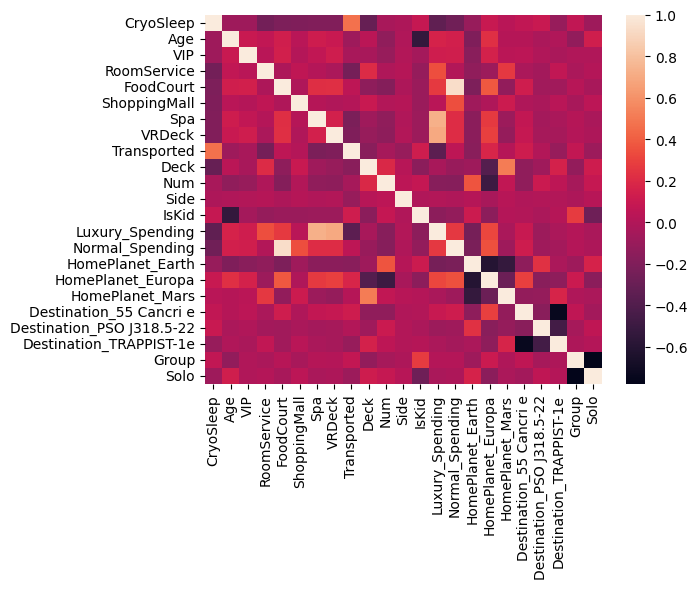

In [ ]:
sns.heatmap(train.corr()) #CryoSleep, Luxury spending, RoomService seem to be highly correlated.

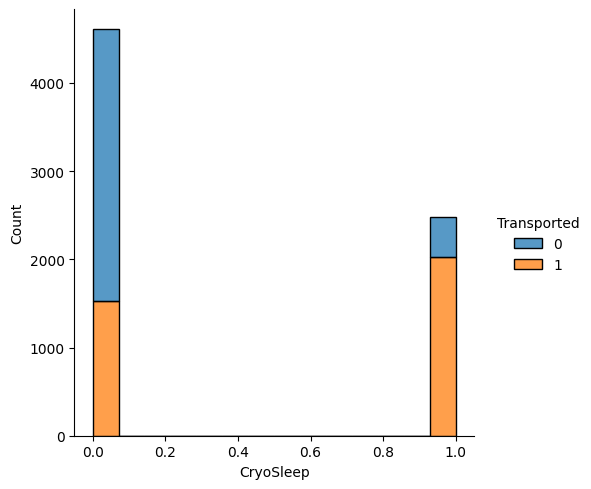

In [ ]:
sns.displot(data = train, x = 'CryoSleep', hue = 'Transported', multiple = "stack")
# Huge correlation with being in CryoSleep and being Transported

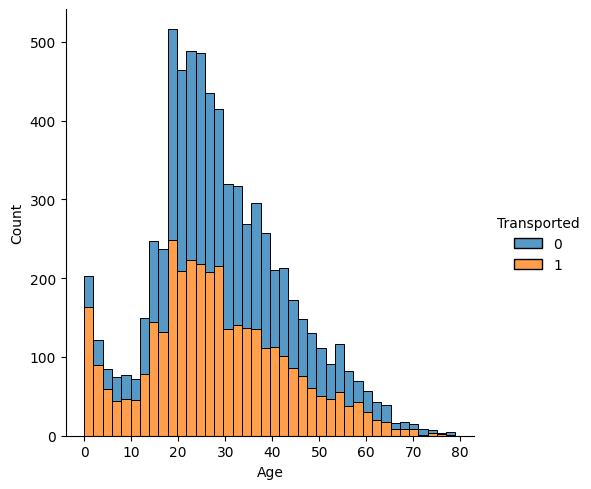

In [ ]:
sns.displot(data = train, x = 'Age', hue = 'Transported', multiple = "stack") #Being a kid means a higher chance of transported so I created an 'IsKid' column

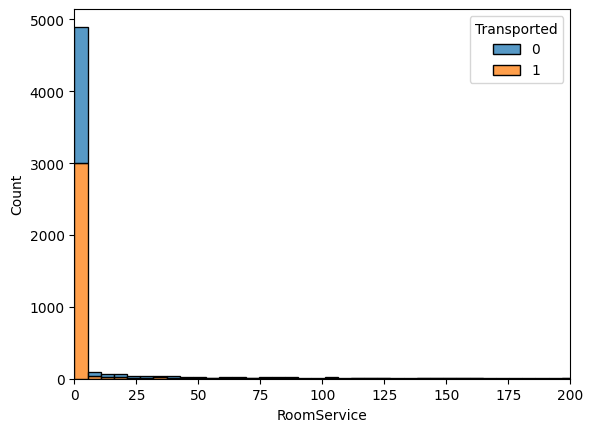

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim(0, 200)
sns.histplot(data = train, x = 'RoomService', hue = 'Transported', multiple = "stack", ax = ax) #Seems like purchasing no room service means higher chance of being transported so I created a 'No_luxury' column.
plt.show()

# Training & Testing:

In [ ]:
# Set target column as y
y = train['Transported']
train = train.drop(['Transported'], axis = 1)

In [ ]:
# Creates test/train splits
from sklearn.model_selection import train_test_split
X = train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

## Models:

### Logistic Regression Model:

In [ ]:
# Trains logistic regression model on data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.7884280237016382

In [ ]:
# Creates predictions and brings back the 'PassengerId' and 'Transported' Columns
preds = logreg.predict(test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


### Random Forest:

In [ ]:
# Trains the random forest model
from sklearn.ensemble import RandomForestClassifier

# Iterative Method:
error_rates = []

for k in range(1, 200):
  rtc = RandomForestClassifier(n_estimators = k)
  rtc.fit(X_train, y_train)
  predict_k = rtc.predict(X_test)
  error_rates.append(np.mean(predict_k != y_test))

Text(0, 0.5, 'Error Rate')

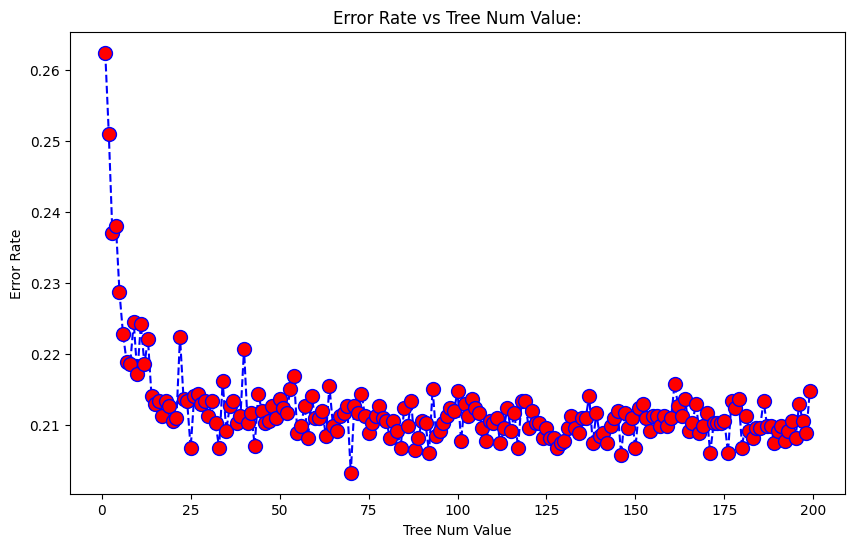

In [ ]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 200), error_rates, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title("Error Rate vs Tree Num Value:")
plt.xlabel("Tree Num Value")
plt.ylabel("Error Rate")

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rtc = RandomForestClassifier(n_estimators = 100)
rtc.fit(X_train, y_train)
print(rtc.score(X_test, y_test))

# Creates predictions and brings back the 'PassengerId' and 'Transported' Columns
preds = rtc.predict(test)

0.789822237713489


### kNN:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Iterative Method:
error_rates = []

for k in range(1, 100):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  predict_k = knn.predict(X_test)
  error_rates.append(np.mean(predict_k != y_test))

Text(0, 0.5, 'Error Rate')

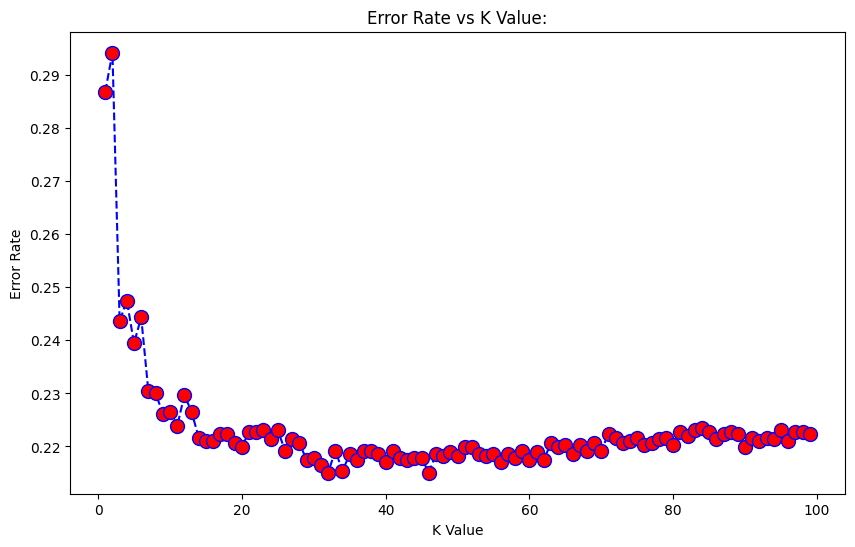

In [ ]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 100), error_rates, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title("Error Rate vs K Value:")
plt.xlabel("K Value")
plt.ylabel("Error Rate")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 59)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

# Creates predictions and brings back the 'PassengerId' and 'Transported' Columns
preds = knn.predict(test)

0.7807598466364587


### CatBoost:

In [ ]:
!pip install catboost
import catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 5.3 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
cat=CatBoostClassifier(iterations=1500, eval_metric='Accuracy')

In [ ]:
cat.fit(X_train,y_train)

Learning rate set to 0.015073
0:	learn: 0.7809066	total: 50.2ms	remaining: 1m 15s
1:	learn: 0.7867445	total: 55.2ms	remaining: 41.3s
2:	learn: 0.7956731	total: 62.3ms	remaining: 31.1s
3:	learn: 0.7939560	total: 71.9ms	remaining: 26.9s
4:	learn: 0.7905220	total: 77.2ms	remaining: 23.1s
5:	learn: 0.7922390	total: 87ms	remaining: 21.7s
6:	learn: 0.7913805	total: 96.9ms	remaining: 20.7s
7:	learn: 0.7912088	total: 104ms	remaining: 19.4s
8:	learn: 0.7922390	total: 112ms	remaining: 18.6s
9:	learn: 0.7922390	total: 121ms	remaining: 18s
10:	learn: 0.7922390	total: 130ms	remaining: 17.6s
11:	learn: 0.7937843	total: 138ms	remaining: 17.2s
12:	learn: 0.7915522	total: 147ms	remaining: 16.8s
13:	learn: 0.7924107	total: 156ms	remaining: 16.5s
14:	learn: 0.7939560	total: 164ms	remaining: 16.2s
15:	learn: 0.7936126	total: 172ms	remaining: 16s
16:	learn: 0.7939560	total: 181ms	remaining: 15.8s
17:	learn: 0.7941277	total: 196ms	remaining: 16.1s
18:	learn: 0.7941277	total: 201ms	remaining: 15.7s
19:	learn

In [ ]:
cat.score(X_test, y_test)

0.7985360752875567

In [ ]:
cat.fit(X, y)

Learning rate set to 0.017885
0:	learn: 0.7743012	total: 4.58ms	remaining: 6.86s
1:	learn: 0.7802830	total: 10.2ms	remaining: 7.61s
2:	learn: 0.7866099	total: 13.9ms	remaining: 6.94s
3:	learn: 0.7860347	total: 19.3ms	remaining: 7.23s
4:	learn: 0.7822386	total: 23.4ms	remaining: 6.99s
5:	learn: 0.7862648	total: 29.2ms	remaining: 7.27s
6:	learn: 0.7829288	total: 33.1ms	remaining: 7.07s
7:	learn: 0.7831589	total: 38.1ms	remaining: 7.11s
8:	learn: 0.7836190	total: 42ms	remaining: 6.95s
9:	learn: 0.7838491	total: 47ms	remaining: 7.01s
10:	learn: 0.7841942	total: 53.3ms	remaining: 7.21s
11:	learn: 0.7855746	total: 57.4ms	remaining: 7.12s
12:	learn: 0.7847694	total: 62.1ms	remaining: 7.11s
13:	learn: 0.7866099	total: 74.1ms	remaining: 7.86s
14:	learn: 0.7881054	total: 78ms	remaining: 7.72s
15:	learn: 0.7870701	total: 82.7ms	remaining: 7.67s
16:	learn: 0.7879903	total: 86.5ms	remaining: 7.54s
17:	learn: 0.7879903	total: 90.3ms	remaining: 7.43s
18:	learn: 0.7884505	total: 96ms	remaining: 7.48s


In [ ]:
preds = cat.predict(test)

### XGBoost:

In [ ]:
import xgboost

In [ ]:
xgb = xgboost.XGBClassifier(eval_metric='logloss', learning_rate = 0.05, n_estimators = 150, max_depth=5)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [ ]:
xgb.score(X_test, y_test)

0.7811084001394214

In [ ]:
preds = xgb.predict(test)

### Light GBM Classifier:

In [ ]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(X_train, y_train)
lgb.score(X_test, y_test)

0.7985360752875567

In [ ]:
lgb.fit(X, y)
preds = lgb.predict(test)

### Feed-Forward Neural Network (MLP):

In [ ]:
# Imports
import torch
from torch import nn
import torch.optim as optim

In [ ]:
# Categorical columns (don't normalize these) and continuous columns for normalization:
cat_cols = X.columns[X.nunique() == 2]
continuous_cols = X.columns[X.nunique() != 2]

In [ ]:
# Normalize data
# Train Data:
X_train_mean = np.mean(X_train[continuous_cols])
X_train_std = np.std(X_train[continuous_cols])
X_train_norm = (X_train[continuous_cols] - X_train_mean)/X_train_std
X_train[continuous_cols] = X_train_norm

# Test Data:
X_test_mean = np.mean(X_test[continuous_cols])
X_test_std = np.std(X_test[continuous_cols])
X_test_norm = (X_test[continuous_cols] - X_test_mean)/X_test_std
X_test[continuous_cols] = X_test_norm

# Val Data:
test_mean = np.mean(test[continuous_cols])
test_std = np.std(test[continuous_cols])
test_norm = (test[continuous_cols] - test_mean)/test_std
test[continuous_cols] = test_norm

In [ ]:
# Convert the training data to tensors, allowing pytorch to handle it
X_train = torch.tensor(X_train.values, dtype=torch.float)
y_train = torch.tensor(y_train.values, dtype=torch.long)
X_test = torch.tensor(X_test.values, dtype=torch.float)
y_test = torch.tensor(y_test.values, dtype=torch.long)

In [ ]:
# Neural Network Architecture Function
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.hidden1 = nn.Linear(X_train.shape[1], 16)
    self.hidden2 = nn.Linear(16, 64)
    self.hidden3 = nn.Linear(64, 32)
    self.hidden4 = nn.Linear(32, 16)
    self.hidden5 = nn.Linear(16, 2)

  def forward(self, x):
    x = torch.relu(self.hidden1(x)) # Applies relu activation to layer
    x = torch.relu(self.hidden2(x)) # Relu
    x = torch.relu(self.hidden3(x))
    x = torch.relu(self.hidden4(x))
    x = self.hidden5(x) # Output
    return x

In [ ]:
# Create NN
model = NeuralNetwork()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
print(model)

NeuralNetwork(
  (hidden1): Linear(in_features=22, out_features=16, bias=True)
  (hidden2): Linear(in_features=16, out_features=64, bias=True)
  (hidden3): Linear(in_features=64, out_features=32, bias=True)
  (hidden4): Linear(in_features=32, out_features=16, bias=True)
  (hidden5): Linear(in_features=16, out_features=2, bias=True)
)


In [ ]:
# Format training data for Pytorch
from torch.utils.data import DataLoader, TensorDataset
train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_data, batch_size = 32)

In [ ]:
# Train NN
epochs = 200
loss_list = np.zeros((epochs,))

for epoch in range(epochs):
  running_loss = 0
  for inputs, targets in train_loader:
    optimizer.zero_grad() # reset optimizer gradients
    outputs = model(inputs) # forward pass data through nodes/layers
    loss = loss_fn(outputs, targets) # compute loss
    loss_list[epoch] = loss.item()
    running_loss += loss.item()
    loss.backward() # backprop
    optimizer.step() # update weighst

  if epoch % 10 == 0:
    print(f'Epoch [{epoch}/100], Loss: {running_loss/len(train_loader)}')

Epoch [0/100], Loss: 0.6925851797664558
Epoch [10/100], Loss: 0.5686092966205472
Epoch [20/100], Loss: 0.42285995987745434
Epoch [30/100], Loss: 0.41449761619934666
Epoch [40/100], Loss: 0.4074141521539007
Epoch [50/100], Loss: 0.4009932178062397
Epoch [60/100], Loss: 0.3965099116603097
Epoch [70/100], Loss: 0.393154240162163
Epoch [80/100], Loss: 0.3903624959863149
Epoch [90/100], Loss: 0.38796481023450474
Epoch [100/100], Loss: 0.3858909008430911
Epoch [110/100], Loss: 0.38386608701158353
Epoch [120/100], Loss: 0.3819359213441283
Epoch [130/100], Loss: 0.37981013781749284
Epoch [140/100], Loss: 0.37772701647910445
Epoch [150/100], Loss: 0.37561570705620795
Epoch [160/100], Loss: 0.37353346898005557
Epoch [170/100], Loss: 0.3717144298684466
Epoch [180/100], Loss: 0.3696290542791178
Epoch [190/100], Loss: 0.3678622864759885


In [ ]:
# Print accuracy
with torch.no_grad():
  out = model(X_test)
  _, predicted = torch.max(out.data, 1)
  total = y_test.size(0)
  correct = (predicted == y_test).sum().item()
  print("Accuracy of the model based on y_test: {}%".format(100 * correct/total))

Accuracy of the model based on y_test: 79.3307772743116%


In [ ]:
# Convert the testing data to tensors, allowing pytorch to handle it
test = torch.tensor(test.values, dtype=torch.float)

In [ ]:
# Format testing data
from torch.utils.data import DataLoader, TensorDataset
train_data = TensorDataset(test)
train_loader = DataLoader(train_data, batch_size = 32)

In [ ]:
# Train model and check accuracy on test
with torch.no_grad():
  out = model(test)
  _, preds = torch.max(out.data, 1)

In [ ]:
preds

tensor([0, 0, 1,  ..., 1, 1, 1])

### Gradient Boosting Classifier:

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc.get_params()

In [ ]:
# :
gbc = GradientBoostingClassifier(learning_rate = 0.01, n_estimators = 81, max_depth=5)
gbc.fit(X_train,y_train)
gbc.score(X_test, y_test)

0.7926106657371906

In [ ]:
# ACTUAL HYPER:
gbc = GradientBoostingClassifier(learning_rate = 0.05, n_estimators = 81, max_depth=5)
gbc.fit(X_train,y_train)
gbc.score(X_test, y_test)

0.7908678982223771

In [ ]:
gbc.fit(X, y)

GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=81)

In [ ]:
preds = gbc.predict(test)

## Hyperparameter Tuning:

### Bayes for Random Forest:

In [ ]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 5.6 MB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV
from sklearn.metrics import accuracy_score


search_space = {
    'max_depth':(1, 200), # Provide it a range since the program itself picks the points it wants to search
    'min_samples_split':(1, 100),
    'criterion':['gini', 'entropy']
}
opt = BayesSearchCV(estimator = rtc, search_spaces = search_space, scoring = 'neg_mean_squared_error', n_iter = 10, random_state = 100, verbose = 3)
opt.fit(X_train, y_train)
bay_preds = opt.predict(X_test)
print(accuracy_score(y_test, bay_preds))

In [ ]:
opt.fit(X, y)
preds = opt.predict(test)

### Grid Search for Cat Boost:

In [ ]:
# importing and creating grid search variable and set it for our use case
from sklearn.model_selection import GridSearchCV
gcv=GridSearchCV(CatBoostClassifier(),param_grid={'iterations': range(200,2000,200), 'eval_metric': ['Accuracy'],'verbose':[0]},cv=3)

In [ ]:
# training model
gcv.fit(X_train,y_train)
pred_y=gcv.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred_y))

0.8023701638201464


In [ ]:
gcv.fit(X, y)
preds = gcv.predict(test)

# Final Submission:

In [ ]:
# Creates the submission dataframe
preds = pd.Series(preds)
submission_df = pd.DataFrame()
submission_df['PassengerId'] = passenger_ids
submission_df['Transported'] = preds
submission_df['Transported'].replace({1: True, 0: False}, inplace = True)
submission_df

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [ ]:
# Creates the csv file
submission_df.to_csv('submission.csv', index = False)